Note: redshifts have been re-sorted (earliest first)


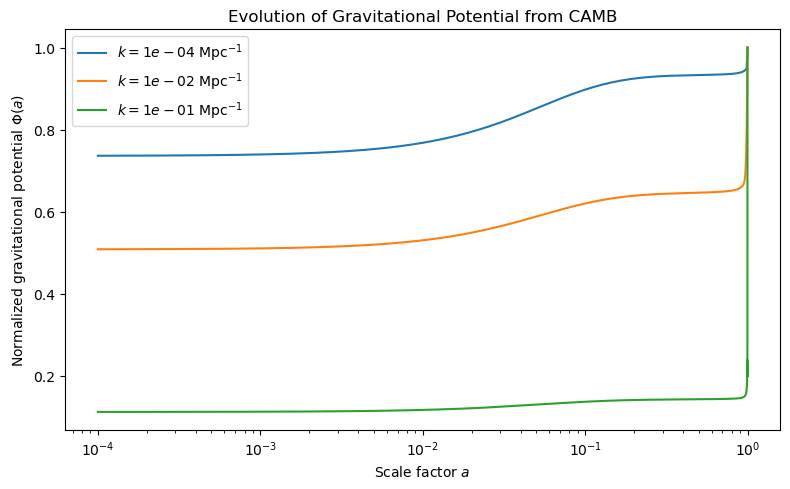

In [8]:
import camb
from camb import model
import numpy as np
import matplotlib.pyplot as plt

# Define cosmological parameters
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965, As=2.1e-9)

# Choose redshift range to sample scale factor evolution
z_vals = np.logspace(-3, 4, 200)  # from z~0 to z~10,000
pars.set_matter_power(redshifts=z_vals.tolist(), kmax=1.0)
pars.WantTransfer = True
pars.Transfer.output_components = ['Weyl']
pars.Transfer.kmax = 1.0
pars.Transfer.redshifts = z_vals.tolist()

# Run CAMB
results = camb.get_results(pars)
transfer = results.get_matter_transfer_data()
k_array = transfer.q  # CAMB returns q ~ k in 1/Mpc

# Choose some k-modes to track
k_vals_to_plot = [1e-4, 1e-2, 1e-1]  # in 1/Mpc

# Compute a = 1 / (1 + z)
a_array = 1 / (1 + z_vals)

# Plot the evolution of phi vs a for each k
plt.figure(figsize=(8,5))
for k_val in k_vals_to_plot:
    # Find the nearest index for k
    k_index = np.argmin(np.abs(k_array - k_val))
    weyl_vals = [transfer.transfer_z('Weyl', i)[k_index] for i in range(len(z_vals))]
    phi_vals = 0.5 * np.array(weyl_vals)
    
    # Normalize to phi(a=1)=1
    phi_vals = np.array(phi_vals)
    phi_vals /= phi_vals[0]
    
    plt.plot(a_array, phi_vals, label=f'$k={k_val:.0e}$ Mpc$^{{-1}}$')

plt.xscale('log')
plt.xlabel('Scale factor $a$')
plt.ylabel('Normalized gravitational potential $\\Phi(a)$')
plt.title('Evolution of Gravitational Potential from CAMB')
plt.legend()
plt.tight_layout()
plt.show()


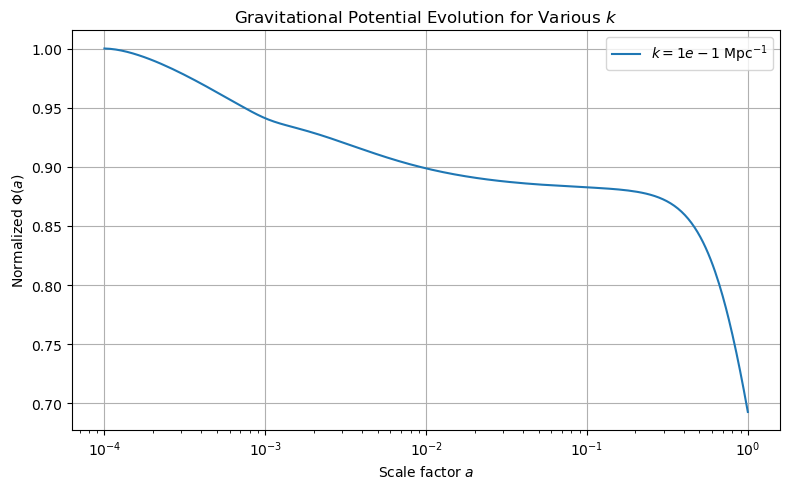

In [40]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

# Set up CLASS
cosmo = Class()
z_vals = np.logspace(-3, 4, 200)  # high to low redshift
a_vals = 1 / (1 + z_vals)

cosmo.set({
    'output': 'mTk',
    'P_k_max_1/Mpc': 1.0,
    'k_output_values': 1e-1,
    'z_pk': ','.join(map(str, z_vals)),
    'z_max_pk': 10000,
    'tau_reio': 0.054,
    'h': 0.675,
    'omega_b': 0.022,
    'omega_cdm': 0.12,
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'matter_source_in_current_gauge': 'yes'
})
cosmo.compute()


plt.figure(figsize=(8, 5))

phi_vals1 = [cosmo.get_transfer(z, 1e-1)['phi'][0] for z in z_vals]
phi_vals1 = np.array(phi_vals1)
phi_vals1 /= phi_vals1[-1]
plt.plot(a_vals, phi_vals1, label="$k = 1e-1$ Mpc$^{-1}$")



plt.xscale('log')
plt.xlabel("Scale factor $a$")
plt.ylabel("Normalized $\\Phi(a)$")
plt.title("Gravitational Potential Evolution for Various $k$")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("phi_vs_a", dpi=300)
plt.show()

cosmo.struct_cleanup()
cosmo.empty()


In [58]:
from classy import Class
import numpy as np

z_vals = np.logspace(-3, 4, 200)
a_vals = 1 / (1 + z_vals)
k_vals = [1e-4, 1e-3, 1e-2, 1e-1]

# Configure CLASS
cosmo = Class()
cosmo.set({
    'output': 'mTk',
    'k_output_values': ','.join(str(k) for k in k_vals),
    'z_pk': ','.join(str(z) for z in z_vals),
    'z_max_pk': 10000,
    'P_k_max_1/Mpc': 1.0,
    'tau_reio': 0.054,
    'h': 0.675,
    'omega_b': 0.022,
    'omega_cdm': 0.12,
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'matter_source_in_current_gauge': 'yes'
})
cosmo.compute()


In [59]:
for i, k in enumerate(k_vals):
    print(f"\n--- Φ(z) for k = {k:.1e} ---")
    phi_vals = []
    for z in z_vals:
        phi = cosmo.get_transfer(z)['phi'][i]  # use i-th k index
        phi_vals.append(phi)
    
    phi_vals = np.array(phi_vals)
    phi_vals /= phi_vals[-1]  # normalize to present day

    # Print a few samples
    for a, phi in zip(a_vals[:25], phi_vals[:5]):
        print(f"a = {a:.4e}, Φ = {phi:.4e}")



--- Φ(z) for k = 1.0e-04 ---
a = 9.9900e-01, Φ = 6.9285e-01
a = 9.9892e-01, Φ = 6.9288e-01
a = 9.9883e-01, Φ = 6.9291e-01
a = 9.9873e-01, Φ = 6.9294e-01
a = 9.9862e-01, Φ = 6.9297e-01

--- Φ(z) for k = 1.0e-03 ---
a = 9.9900e-01, Φ = 6.9285e-01
a = 9.9892e-01, Φ = 6.9287e-01
a = 9.9883e-01, Φ = 6.9290e-01
a = 9.9873e-01, Φ = 6.9294e-01
a = 9.9862e-01, Φ = 6.9297e-01

--- Φ(z) for k = 1.0e-02 ---
a = 9.9900e-01, Φ = 6.9285e-01
a = 9.9892e-01, Φ = 6.9287e-01
a = 9.9883e-01, Φ = 6.9290e-01
a = 9.9873e-01, Φ = 6.9294e-01
a = 9.9862e-01, Φ = 6.9297e-01

--- Φ(z) for k = 1.0e-01 ---
a = 9.9900e-01, Φ = 6.9284e-01
a = 9.9892e-01, Φ = 6.9287e-01
a = 9.9883e-01, Φ = 6.9290e-01
a = 9.9873e-01, Φ = 6.9293e-01
a = 9.9862e-01, Φ = 6.9297e-01


In [60]:
# Choose specific scale factors to inspect
a_targets = [1e-2, 1e-1, 0.5, 1.0]  # you can add more here

for i, k in enumerate(k_vals):
    print(f"\n--- Φ(a) for k = {k:.1e} ---")
    phi_vals = [cosmo.get_transfer(z)['phi'][i] for z in z_vals]
    phi_vals = np.array(phi_vals)
    phi_vals /= phi_vals[-1]  # normalize at a = 1

    for a_target in a_targets:
        idx = np.argmin(np.abs(a_vals - a_target))
        print(f"a = {a_vals[idx]:.4e}, Φ = {phi_vals[idx]:.4e}")



--- Φ(a) for k = 1.0e-04 ---
a = 1.0015e-02, Φ = 8.9866e-01
a = 1.0305e-01, Φ = 8.8258e-01
a = 5.0579e-01, Φ = 8.4076e-01
a = 9.9900e-01, Φ = 6.9285e-01

--- Φ(a) for k = 1.0e-03 ---
a = 1.0015e-02, Φ = 8.9866e-01
a = 1.0305e-01, Φ = 8.8258e-01
a = 5.0579e-01, Φ = 8.4076e-01
a = 9.9900e-01, Φ = 6.9285e-01

--- Φ(a) for k = 1.0e-02 ---
a = 1.0015e-02, Φ = 8.9866e-01
a = 1.0305e-01, Φ = 8.8258e-01
a = 5.0579e-01, Φ = 8.4076e-01
a = 9.9900e-01, Φ = 6.9285e-01

--- Φ(a) for k = 1.0e-01 ---
a = 1.0015e-02, Φ = 8.9866e-01
a = 1.0305e-01, Φ = 8.8258e-01
a = 5.0579e-01, Φ = 8.4076e-01
a = 9.9900e-01, Φ = 6.9284e-01


In [61]:
a_target = 1e-2
idx = np.argmin(np.abs(a_vals - a_target))

print(f"\n--- Φ(a = {a_vals[idx]:.2e}) ---")
for i, k in enumerate(k_vals):
    phi_vals = [cosmo.get_transfer(z)['phi'][i] for z in z_vals]
    phi_vals = np.array(phi_vals)
    phi_vals /= phi_vals[-1]
    print(f"k = {k:.1e}  →  Φ = {phi_vals[idx]:.4f}")



--- Φ(a = 1.00e-02) ---
k = 1.0e-04  →  Φ = 0.8987
k = 1.0e-03  →  Φ = 0.8987
k = 1.0e-02  →  Φ = 0.8987
k = 1.0e-01  →  Φ = 0.8987


In [62]:
print(','.join(str(k) for k in k_vals))


0.0001,0.001,0.01,0.1


In [63]:
for z in [100, 10, 0]:
    phi_array = cosmo.get_transfer(z)['phi']
    print(f"z = {z}, Φ(k) = {phi_array}")


z = 100, Φ(k) = [0.61231455 0.61231436 0.61231412 0.61231363 0.61231288 0.61231167
 0.61230976 0.61230674 0.61230195 0.61229434 0.6122823  0.61226322
 0.6122493  0.61223299 0.61218509 0.61210922 0.61198905 0.61179883
 0.61149793 0.61102246 0.61027247 0.60909274 0.60724519 0.60591381
 0.60437168 0.59995084 0.59326389 0.58340987 0.56945851 0.55081677
 0.5277446  0.50134522 0.47195116 0.43742916 0.41691597 0.3963923
 0.34978552 0.2981936  0.24523771 0.19933734 0.17265162 0.15844141
 0.14899511 0.1416926  0.1354789  0.12982864 0.1244568  0.11920629
 0.11400045 0.10881769 0.10367665 0.09862406 0.09372629 0.08905818
 0.0846936  0.08069501 0.07710377 0.07393265 0.07116028 0.068731
 0.06655812 0.06453328 0.0625404  0.0604735  0.05825579 0.05585524
 0.05329337 0.05064314 0.05017957 0.04801502 0.04553344 0.04330459
 0.04138696 0.03977182 0.03838183 0.03709743 0.03578564 0.03434251
 0.03274686 0.03106594 0.02941896 0.02791867 0.02662975 0.02554108
 0.02456317 0.02357965 0.02251952 0.02139091 0.02

In [64]:
import numpy as np

# Your specific k values
k_targets = np.array([1e-4, 1e-3, 1e-2, 1e-1])

# Get one transfer dict to infer internal k grid length
sample_transfer = cosmo.get_transfer(z_vals[0])
n_k = len(sample_transfer['phi'])

# Construct internal k grid manually (CLASS doesn’t return it directly)
# You know CLASS used a log grid roughly spanning the domain
k_full = np.logspace(-4, 0, n_k)  # Adjust this range if needed

# Map each desired k_target to its closest index in CLASS's k grid
k_indices = [np.argmin(np.abs(k_full - k)) for k in k_targets]

# ✅ Print values of Φ for selected a (e.g., a = 1e-2)
a_target = 1e-2
i_a = np.argmin(np.abs(a_vals - a_target))

print(f"--- Φ(a = {a_vals[i_a]:.2e}) for selected k ---")
for i, k in zip(k_indices, k_targets):
    phi_vals = [cosmo.get_transfer(z)['phi'][i] for z in z_vals]
    phi_vals = np.array(phi_vals)
    phi_vals /= phi_vals[-1]  # Normalize to present day

    print(f"k = {k:.1e} → Φ = {phi_vals[i_a]:.4f}")


--- Φ(a = 1.00e-02) for selected k ---
k = 1.0e-04 → Φ = 0.8987
k = 1.0e-03 → Φ = 0.8044
k = 1.0e-02 → Φ = 0.1499
k = 1.0e-01 → Φ = 0.4385


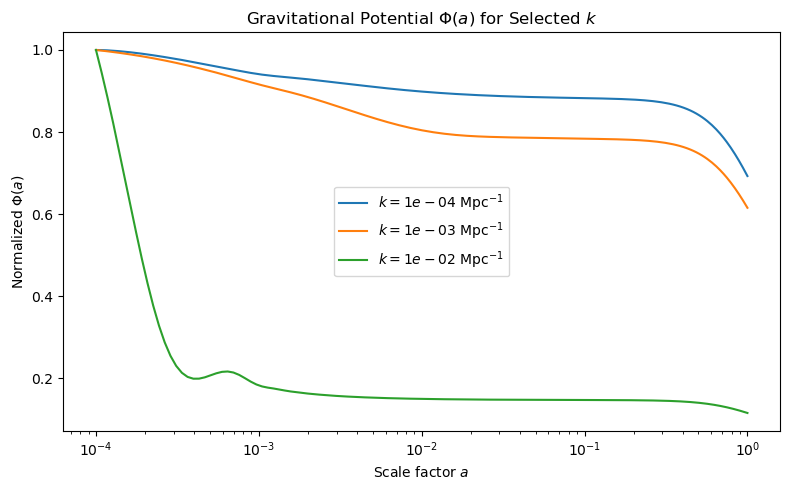

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# These are your selected k values
k_targets = np.array([1e-4, 1e-3, 1e-2])

# Get one transfer dict to find how many k-values CLASS outputs
sample_transfer = cosmo.get_transfer(z_vals[0])
n_k = len(sample_transfer['phi'])

# Reconstruct CLASS’s internal k-grid (logspacing assumed)
k_full = np.logspace(-4, 0, n_k)

# Map your desired k-values to CLASS's internal grid
k_indices = [np.argmin(np.abs(k_full - k)) for k in k_targets]

# Plot setup
plt.figure(figsize=(8, 5))

for i, k in zip(k_indices, k_targets):
    phi_vals = [cosmo.get_transfer(z)['phi'][i] for z in z_vals]
    phi_vals = np.array(phi_vals)
    phi_vals /= phi_vals[-1]  # normalize at z = 0

    plt.plot(a_vals, phi_vals, label=f"$k = {k:.0e}$ Mpc$^{{-1}}$")

# Axis formatting
plt.xscale('log')
plt.xlabel("Scale factor $a$")
plt.ylabel("Normalized $\\Phi(a)$")
plt.title("Gravitational Potential $\\Phi(a)$ for Selected $k$")
plt.legend()
plt.tight_layout()
plt.savefig("phi_vs_a_selected_k.png", dpi=300)
plt.show()


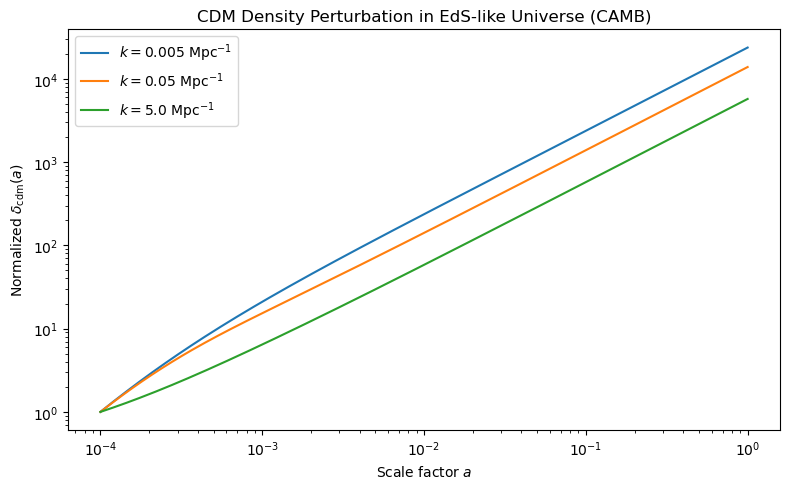

In [84]:
import camb
from camb import model
import numpy as np
import matplotlib.pyplot as plt

# Define scale factor and redshifts
a_vals = np.logspace(-4, 0, 200)
z_vals = 1 / a_vals - 1

# Target k modes (in 1/Mpc)
k_vals = [0.005, 0.05, 5.0]

# CAMB settings for EdS-like universe
pars = camb.CAMBparams()
pars.set_cosmology(H0=70, ombh2=0.05 * (70 / 100)**2, omch2=0.95 * (70 / 100)**2, mnu=0.0, omk=0)
pars.InitPower.set_params(ns=1.0, As=2e-9)
pars.set_matter_power(redshifts=z_vals.tolist(), kmax=10)
pars.WantTransfer = True
pars.Transfer.output_components = ['delta_cdm']
pars.Transfer.kmax = 10.0
pars.Transfer.redshifts = z_vals.tolist()

# Run CAMB
results = camb.get_results(pars)
transfer = results.get_matter_transfer_data()
k_array = transfer.q

# Plotting
plt.figure(figsize=(8, 5))

for k_target in k_vals:
    k_idx = np.argmin(np.abs(k_array - k_target))
    delta_k = [transfer.transfer_z('delta_cdm', iz)[k_idx] for iz in range(len(z_vals))]
    delta_k = np.array(delta_k)
    delta_k /= delta_k[0]  # Normalize to a=1
    plt.loglog(a_vals, delta_k, label=f"$k = {k_target}$ Mpc$^{{-1}}$")

plt.xlabel("Scale factor $a$")
plt.ylabel("Normalized $\\delta_{{\\rm cdm}}(a)$")
plt.title("CDM Density Perturbation in EdS-like Universe (CAMB)")
plt.legend()
plt.tight_layout()
plt.savefig("Delta_cdm")
plt.show()


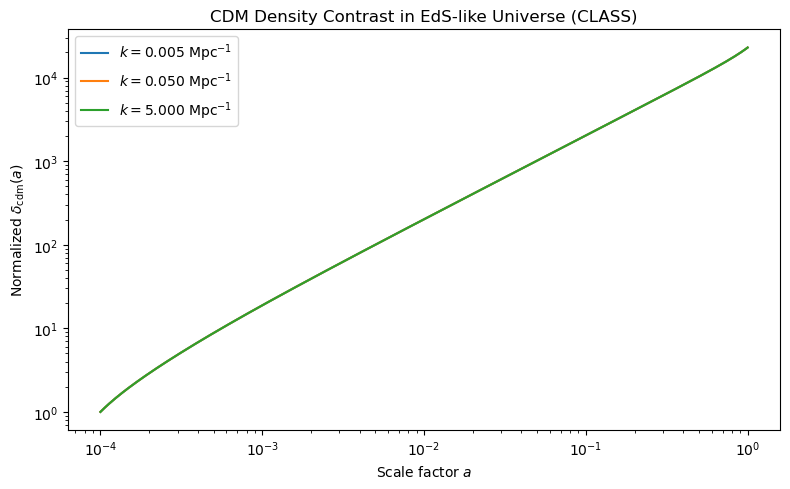

In [95]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

# Scale factor and redshift arrays
a_vals = np.logspace(-4, 0, 300)
z_vals = 1 / a_vals - 1

# k values in 1/Mpc (same as in k_output_values)
k_vals = [0.005, 0.05, 5.0]

# CLASS parameters
params = {
    'output': 'mTk',
    'P_k_max_1/Mpc': 10.0,
    'k_output_values': ','.join([str(k) for k in k_vals]),
    'z_pk': ','.join([f"{z:.6e}" for z in z_vals]),
    'h': 0.7,
    'omega_b': 0.05,
    'omega_cdm': 0.95,
    'YHe': 0.24,
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'tau_reio': 0.054,
    'gauge': 'synchronous',
    'matter_source_in_current_gauge': 'yes'
}

# Run CLASS
cosmo = Class()
cosmo.set(params)
cosmo.compute()

# Use the same k_vals as we passed to CLASS
k_array = np.array(k_vals)

# Plotting
plt.figure(figsize=(8, 5))

for i, k_target in enumerate(k_array):
    # Extract delta_cdm at this k for all z
    delta_cdm = [cosmo.get_transfer(z)['d_cdm'][i] for z in z_vals]
    delta_cdm = np.array(delta_cdm)
    delta_cdm /= delta_cdm[0]  # Normalize to early time

    # Plot
    plt.loglog(a_vals, delta_cdm, label=f"$k = {k_target:.3f}$ Mpc$^{{-1}}$")

plt.xlabel("Scale factor $a$")
plt.ylabel(r"Normalized $\delta_{\rm cdm}(a)$")
plt.title("CDM Density Contrast in EdS-like Universe (CLASS)")
plt.legend()
plt.tight_layout()
plt.savefig("delta_cdm_class_fixed.png", dpi=300)
plt.show()

# Cleanup
cosmo.struct_cleanup()
cosmo.empty()


In [100]:
from classy import Class
import numpy as np

# Target mode and output filename — change these for each run
k_target = 5  # Mpc^{-1}
filename = f"delta_cdm_k_{k_target:.3f}.txt"

# Scale factor and redshift array
a_vals = np.logspace(-4, 0, 300)
z_vals = 1 / a_vals - 1

# CLASS parameters
params = {
    'output': 'mTk',
    'P_k_max_1/Mpc': 10.0,
    'k_output_values': f"{k_target}",
    'z_pk': ','.join([f"{z:.6e}" for z in z_vals]),
    'h': 0.7,
    'omega_b': 0.05,
    'omega_cdm': 0.95,
    'YHe': 0.24,
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'tau_reio': 0.054,
    'gauge': 'synchronous',
    'matter_source_in_current_gauge': 'yes'
}

# Run CLASS
cosmo = Class()
cosmo.set(params)
cosmo.compute()

# Extract δ_cdm at this k=only value for all redshifts
delta_vals = [cosmo.get_transfer(z)['d_cdm'][0] for z in z_vals]
delta_vals = np.array(delta_vals)
delta_vals /= delta_vals[0]  # Normalize at earliest a

# Save to file
np.savetxt(filename, np.column_stack((a_vals, delta_vals)),
           header="a   delta_cdm(a)", fmt="%.8e")
print(f"Saved δ_cdm(a) for k = {k_target} to '{filename}'")

# Cleanup
cosmo.struct_cleanup()
cosmo.empty()


Saved δ_cdm(a) for k = 5 to 'delta_cdm_k_5.000.txt'


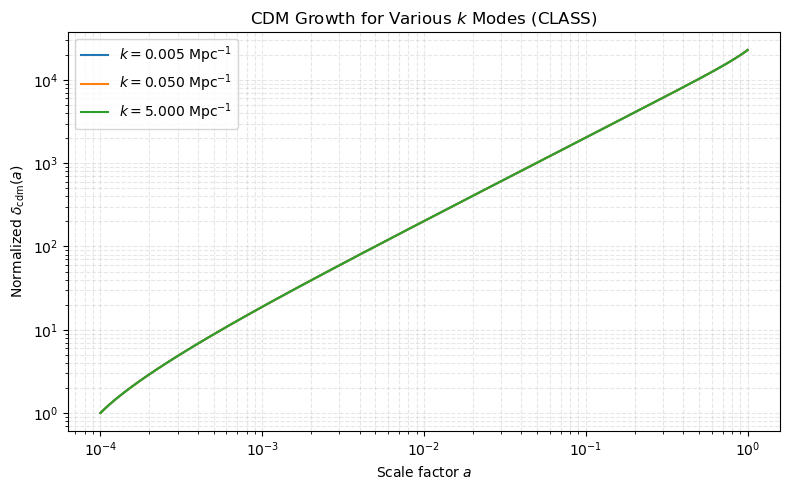

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# List of saved files (make sure these names match exactly)
file_list = [
    "delta_cdm_k_0.005.txt",
    "delta_cdm_k_0.050.txt",
    "delta_cdm_k_5.000.txt"
]

plt.figure(figsize=(8, 5))

# Loop through each file and plot
for fname in file_list:
    data = np.loadtxt(fname)
    a_vals = data[:, 0]
    delta_vals = data[:, 1]

    # Extract k value from filename (for legend)
    k_val = fname.split("_")[-1].replace(".txt", "")
    plt.loglog(a_vals, delta_vals, label=fr"$k = {k_val}$ Mpc$^{{-1}}$")

plt.xlabel("Scale factor $a$")
plt.ylabel(r"Normalized $\delta_{\rm cdm}(a)$")
plt.title("CDM Growth for Various $k$ Modes (CLASS)")
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.3)
plt.tight_layout()
plt.savefig("delta_cdm_all_k.png", dpi=300)
plt.show()


In [102]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

# Setup
a_vals = np.logspace(-4, 0, 200)
z_vals = 1 / a_vals - 1
k_targets = np.array([0.005, 0.05, 5.0])

params = {
    'output': 'mTk',
    'P_k_max_1/Mpc': 10.0,
    'k_output_values': ','.join(map(str, k_targets)),
    'z_pk': ','.join(f"{z:.6e}" for z in z_vals),
    'h': 0.7,
    'omega_b': 0.05,
    'omega_cdm': 0.95,
    'YHe': 0.24,
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'tau_reio': 0.054,
    'gauge': 'synchronous',
    'matter_source_in_current_gauge': 'yes'
}

# Run CLASS
cosmo = Class()
cosmo.set(params)
cosmo.compute()

# 🔍 Print available keys
print("Sample transfer keys at z = {:.3f}:".format(z_vals[0]))
sample_transfer = cosmo.get_transfer(z_vals[0])
print(sample_transfer.keys())

# 🔍 Check number of k modes
n_k = len(sample_transfer['d_cdm'])
print(f"Number of CLASS k modes = {n_k}")

# 🔍 Reconstruct CLASS internal k-grid
k_full = np.logspace(-4, 0, n_k)
print("Reconstructed CLASS k grid:")
print(k_full)

# 🔍 Map target k to indices
k_indices = [np.argmin(np.abs(k_full - k)) for k in k_targets]
print("Selected k values and corresponding indices:")
for k, i in zip(k_targets, k_indices):
    print(f"Target k = {k:.3e}  →  CLASS index = {i}, CLASS k = {k_full[i]:.3e}")

# 🔍 Try a single k and print values
print("\nSample δ_cdm(a) for k = {:.3e}:".format(k_targets[0]))
i = k_indices[0]
delta_vals = np.array([cosmo.get_transfer(z)['d_cdm'][i] for z in z_vals])
delta_vals /= delta_vals[0]
for a, delta in zip(a_vals[::20], delta_vals[::20]):
    print(f"a = {a:.2e}, δ = {delta:.3e}")

cosmo.struct_cleanup()
cosmo.empty()


Sample transfer keys at z = 9999.000:
dict_keys(['k (h/Mpc)', 'd_g', 'd_b', 'd_cdm', 'd_ur', 'd_m', 'd_tot', 'phi', 'psi'])
Number of CLASS k modes = 123
Reconstructed CLASS k grid:
[1.00000000e-04 1.07841740e-04 1.16298408e-04 1.25418227e-04
 1.35253197e-04 1.45859401e-04 1.57297316e-04 1.69632162e-04
 1.82934274e-04 1.97279504e-04 2.12749649e-04 2.29432923e-04
 2.47424455e-04 2.66826837e-04 2.87750703e-04 3.10315364e-04
 3.34649487e-04 3.60891829e-04 3.89192027e-04 4.19711452e-04
 4.52624132e-04 4.88117738e-04 5.26394661e-04 5.67673160e-04
 6.12188611e-04 6.60194848e-04 7.11965610e-04 7.67796100e-04
 8.28004671e-04 8.92934642e-04 9.62956252e-04 1.03846878e-03
 1.11990279e-03 1.20772266e-03 1.30242912e-03 1.40456222e-03
 1.51470434e-03 1.63348351e-03 1.76157703e-03 1.89971532e-03
 2.04868605e-03 2.20933868e-03 2.38258926e-03 2.56942571e-03
 2.77091339e-03 2.98820120e-03 3.22252816e-03 3.47523043e-03
 3.74774896e-03 4.04163767e-03 4.35857238e-03 4.70036028e-03
 5.06895030e-03 5.4664441

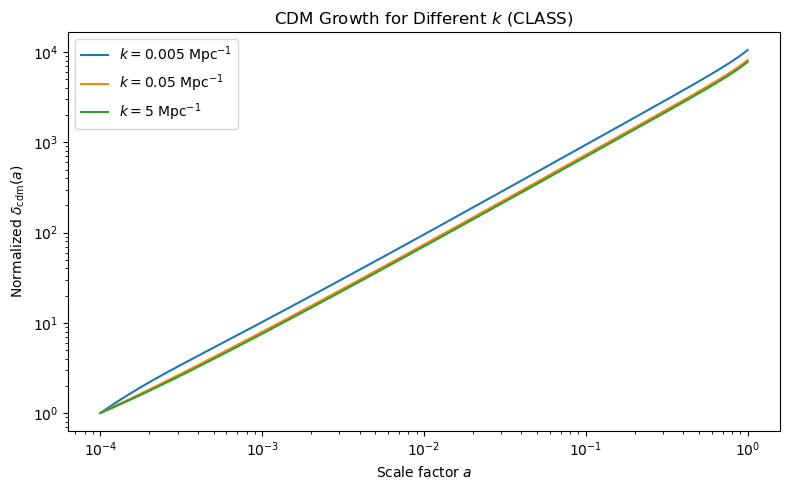

In [104]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

# 1. Define scale factor and redshift grid
a_vals = np.logspace(-4, 0, 200)
z_vals = 1 / a_vals - 1

# 2. Choose k-modes to study
k_targets = np.array([0.005, 0.05, 5.0])

# 3. CLASS input parameters
params = {
    'output': 'mTk',
    'P_k_max_1/Mpc': 10.0,
    'k_output_values': ','.join(map(str, k_targets)),
    'z_pk': ','.join(f"{z:.6e}" for z in z_vals),
    'h': 0.7,
    'omega_b': 0.05,
    'omega_cdm': 0.95,
    'YHe': 0.24,
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'tau_reio': 0.054,
    'gauge': 'synchronous',
    'matter_source_in_current_gauge': 'yes'
}

# 4. Run CLASS
cosmo = Class()
cosmo.set(params)
cosmo.compute()

# 5. Reconstruct CLASS k-grid (assumed logspaced)
sample_transfer = cosmo.get_transfer(z_vals[0])
n_k = len(sample_transfer['d_cdm'])
k_full = np.logspace(-4, 0, n_k)

# 6. Map desired k-values to CLASS grid
k_indices = [np.argmin(np.abs(k_full - k)) for k in k_targets]

# 7. Plot δ_cdm(a) for each k
plt.figure(figsize=(8, 5))

for k, i in zip(k_targets, k_indices):
    delta_vals = [cosmo.get_transfer(z)['d_cdm'][i] for z in z_vals]
    delta_vals = np.array(delta_vals)
    delta_vals /= delta_vals[0]  # normalize at early a

    plt.loglog(a_vals, delta_vals, label=fr"$k = {k:.3g}$ Mpc$^{{-1}}$")

# 8. Beautify plot
plt.xlabel("Scale factor $a$")
plt.ylabel(r"Normalized $\delta_{\rm cdm}(a)$")
plt.title("CDM Growth for Different $k$ (CLASS)")
plt.legend()
plt.tight_layout()
plt.savefig("delta_cdm_debugged.png", dpi=300)
plt.show()

# 9. Cleanup
cosmo.struct_cleanup()
cosmo.empty()


Note: redshifts have been re-sorted (earliest first)


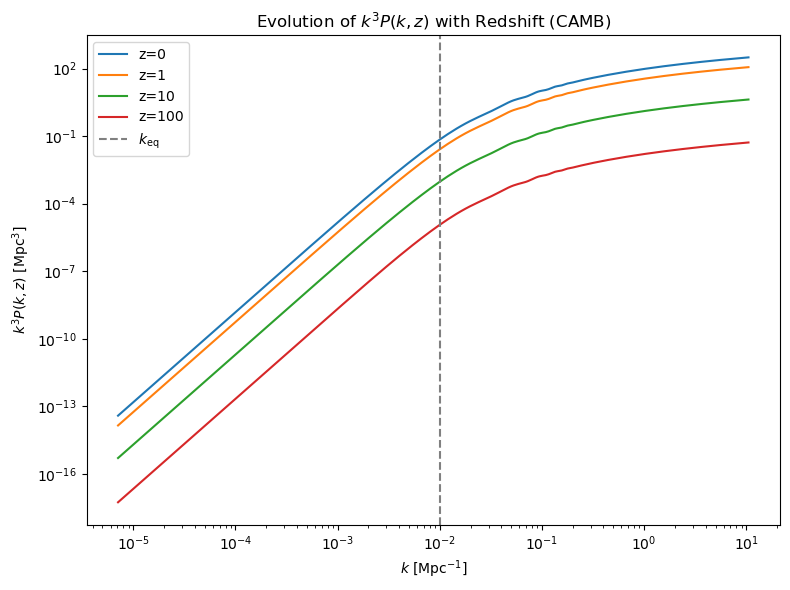

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model

# Set CAMB parameters
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(As=2e-9, ns=1.0)
pars.set_matter_power(redshifts=[0, 1, 10, 100], kmax=10)

# Run CAMB
results = camb.get_results(pars)
k, z, pk = results.get_linear_matter_power_spectrum(hubble_units=False, k_hunit=False)

# Plot k^3 * P(k, z)
k3Pk = k**3 * pk

plt.figure(figsize=(8,6))
for i, zval in enumerate(z):
    label = f"z={zval:.0f}"
    plt.loglog(k, k3Pk[i], label=label)

plt.axvline(x=0.01, color='gray', linestyle='--', label=r"$k_{\rm eq}$")
plt.xlabel(r"$k$ [Mpc$^{-1}$]")
plt.ylabel(r"$k^3 P(k,z)$ [Mpc$^3$]")
plt.title(r"Evolution of $k^3 P(k,z)$ with Redshift (CAMB)")
plt.legend()
plt.tight_layout()
plt.savefig("k^3P")
plt.show()


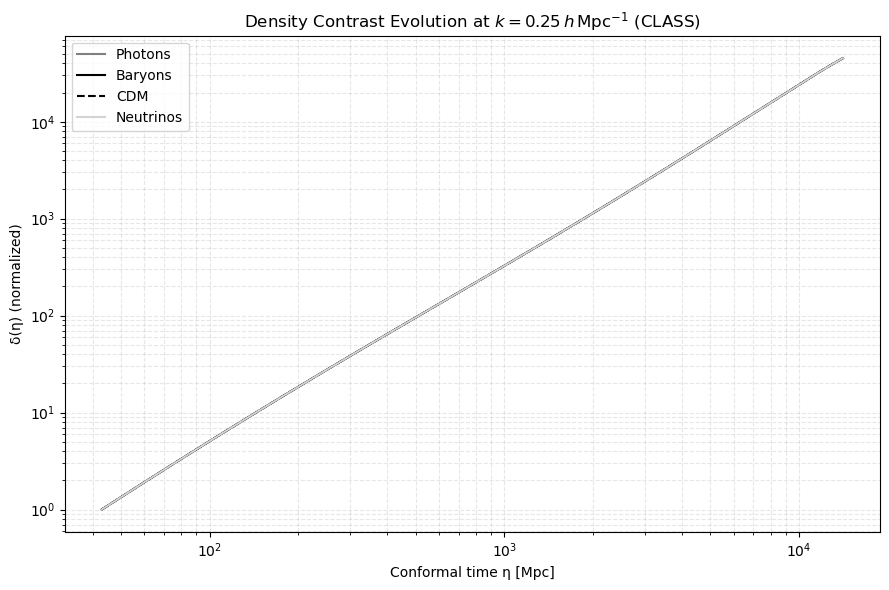

In [10]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

# Define scale factor grid and corresponding redshifts
a_vals = np.logspace(-4, 0, 300)
z_vals = 1 / a_vals - 1

# k value in h/Mpc
k_val = 0.25

# Setup CLASS
params = {
    'output': 'mTk',  # ✅ ONLY transfer functions
    'P_k_max_h/Mpc': 1.0,
    'k_output_values': f"{k_val}",
    'z_pk': ','.join([f"{z:.6e}" for z in z_vals]),
    'h': 0.7,
    'omega_b': 0.022,
    'omega_cdm': 0.12,
    'tau_reio': 0.054,
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'gauge': 'synchronous',
    'YHe': 0.24,
    'matter_source_in_current_gauge': 'yes'  # helpful for early times
}


cosmo = Class()
cosmo.set(params)
cosmo.compute()

# Get transfer data
eta_vals = []
delta_cdm, delta_b, delta_g, delta_nu = [], [], [], []

background = cosmo.get_background()
z_bg = background['z']
a_bg = 1 / (1 + z_bg)
eta_bg = background['conf. time [Mpc]']


# Interpolate η(z) over z_vals
from scipy.interpolate import interp1d
eta_interp = interp1d(z_bg, eta_bg, kind='cubic', bounds_error=False, fill_value="extrapolate")
eta_vals = eta_interp(z_vals)


for z in z_vals:
    tr = cosmo.get_transfer(z)
    delta_cdm.append(tr['d_cdm'][0])
    delta_b.append(tr['d_b'][0])
    delta_g.append(tr['d_g'][0])
    delta_nu.append(tr['d_ur'][0])

# Normalize to initial value
normalize = lambda arr: np.array(arr) / arr[0]

plt.figure(figsize=(9, 6))
plt.plot(eta_vals, normalize(delta_g), label='Photons', color='gray')
plt.plot(eta_vals, normalize(delta_b), label='Baryons', color='black')
plt.plot(eta_vals, normalize(delta_cdm), label='CDM', color='black', linestyle='--')
plt.plot(eta_vals, normalize(delta_nu), label='Neutrinos', color='lightgray')

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Conformal time η [Mpc]")
plt.ylabel("δ(η) (normalized)")
plt.title(r"Density Contrast Evolution at $k = 0.25\, h\,{\rm Mpc}^{-1}$ (CLASS)")
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.3)
plt.tight_layout()
plt.savefig("delta_contrast_species_CLASS.png", dpi=300)
plt.show()

cosmo.struct_cleanup()
cosmo.empty()


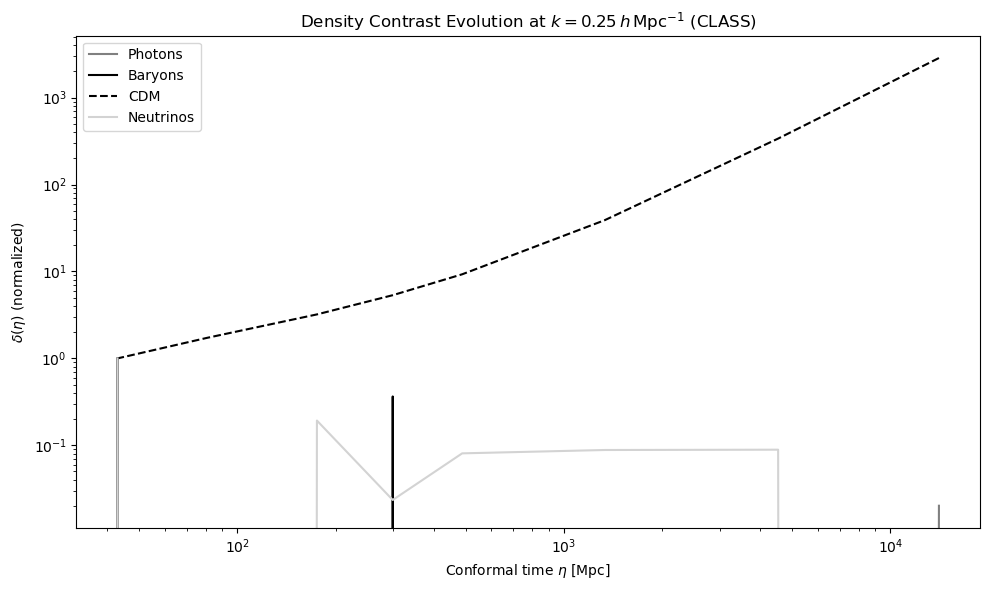

In [21]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

# Cosmology parameters
params = {
    'output': 'mTk',  # matter transfer functions only
    'k_output_values': '0.25',  # target k [in h/Mpc]
    'z_pk': '0,10,100,500,1000,2000,5000,9999',  # redshifts of interest
    'h': 0.7,
    'omega_b': 0.022,
    'omega_cdm': 0.12,
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'YHe': 0.24,  # helium fraction (avoid BBN issues)
    'tau_reio': 0.054,
    'gauge': 'synchronous',
    'N_ur': 3.046,
    'P_k_max_1/Mpc': 10,
    'YHe': 0.24,
    'matter_source_in_current_gauge': 'yes'  # helpful for early times
}

# Initialize and run CLASS
cosmo = Class()
cosmo.set(params)
cosmo.compute()

# Get redshift values and scale factors
z_vals = np.array([0, 10, 100, 500, 1000, 2000, 5000, 9999])
a_vals = 1 / (1 + z_vals)

# Extract CLASS internal k index
transfer_sample = cosmo.get_transfer(z_vals[0])
k_class = np.array(transfer_sample['k (h/Mpc)'])
k_target = 0.25
k_idx = np.argmin(np.abs(k_class - k_target))

# Arrays for density contrasts and conformal time
delta_g, delta_b, delta_cdm, delta_ur, eta_vals = [], [], [], [], []

# Loop over redshifts
for z in z_vals:
    tr = cosmo.get_transfer(z)
    delta_g.append(tr['d_g'][k_idx])
    delta_b.append(tr['d_b'][k_idx])
    delta_cdm.append(tr['d_cdm'][k_idx])
    delta_ur.append(tr['d_ur'][k_idx])

    # Use background to get conformal time η(z)
    bg = cosmo.get_background()
    eta_z = bg['conf. time [Mpc]'][np.argmin(np.abs(bg['z'] - z))]
    eta_vals.append(eta_z)

# Normalize and convert to numpy
eta_vals = np.array(eta_vals)
delta_g = np.array(delta_g) / delta_g[-1]
delta_b = np.array(delta_b) / delta_b[-1]
delta_cdm = np.array(delta_cdm) / delta_cdm[-1]
delta_ur = np.array(delta_ur) / delta_ur[-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(eta_vals, delta_g, color='gray', label='Photons')
plt.loglog(eta_vals, delta_b, color='black', label='Baryons')
plt.loglog(eta_vals, delta_cdm, color='black', linestyle='--', label='CDM')
plt.loglog(eta_vals, delta_ur, color='lightgray', label='Neutrinos')

plt.xlabel(r"Conformal time $\eta$ [Mpc]")
plt.ylabel(r"$\delta(\eta)$ (normalized)")
plt.title(r"Density Contrast Evolution at $k = 0.25\, h\,\mathrm{Mpc}^{-1}$ (CLASS)")
plt.legend()
plt.savefig("Chapter_6_hero")
plt.tight_layout()
plt.show()

# Cleanup
cosmo.struct_cleanup()
cosmo.empty()


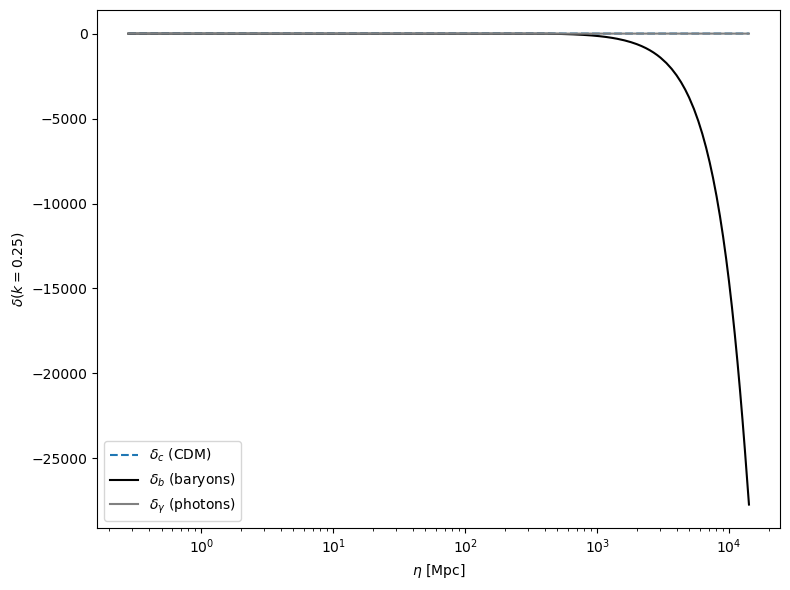

In [117]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

# Target wavenumber
k_val = 0.25  # h/Mpc

# Initialize CLASS
cosmo = Class()
cosmo.set({
    'output': 'mPk',
    'P_k_max_1/Mpc': 1.0,
    'k_output_values': k_val,
    'z_max_pk': 200,
    'gauge': 'Newtonian',
    'perturbations_verbose': 1,
    
})
cosmo.compute()

# Get scalar perturbations
perturb = cosmo.get_perturbations()

# Time array (conformal time in Mpc)
#bg = cosmo.get_background()
#tau = np.array(cosmo.get_background()['conf. time [Mpc]'])  # ✅ conformal time from background
#bg['a']                  # scale factor
#bg['z']                  # redshift


# Extract perturbations: [ [k, delta], [k, delta], ... ]
scalar = perturb['scalar']
scalar_data = scalar[0]
tau = np.array(scalar_data['tau [Mpc]'])  # ✅ matches delta arrays

delta_c = np.array(scalar_data['theta_b'])
delta_b = np.array(scalar_data['delta_b'])
delta_g = np.array(scalar_data['delta_g'])
theta_b = np.array(scalar_data['theta_b'])  # use this for -k v_b

plt.figure(figsize=(8,6))
plt.semilogx(tau, delta_c, '--', label=r'$\delta_c$ (CDM)')
plt.semilogx(tau, delta_b, '-', color='black', label=r'$\delta_b$ (baryons)')
plt.semilogx(tau, delta_g, '-', color='gray', label=r'$\delta_\gamma$ (photons)')

plt.xlabel(r'$\eta\ [\mathrm{Mpc}]$')
plt.ylabel(r'$\delta(k=0.25)$')
plt.legend()
plt.tight_layout()
plt.savefig("CLASS_delta_curves")
plt.show()


# Cleanup
cosmo.struct_cleanup()
cosmo.empty()


In [102]:
print(scalar_data['delta_b'])

[-9.02767915e-01 -9.02767916e-01 -9.02767917e-01 ... -2.45141288e+04
 -2.67397795e+04 -2.77176323e+04]


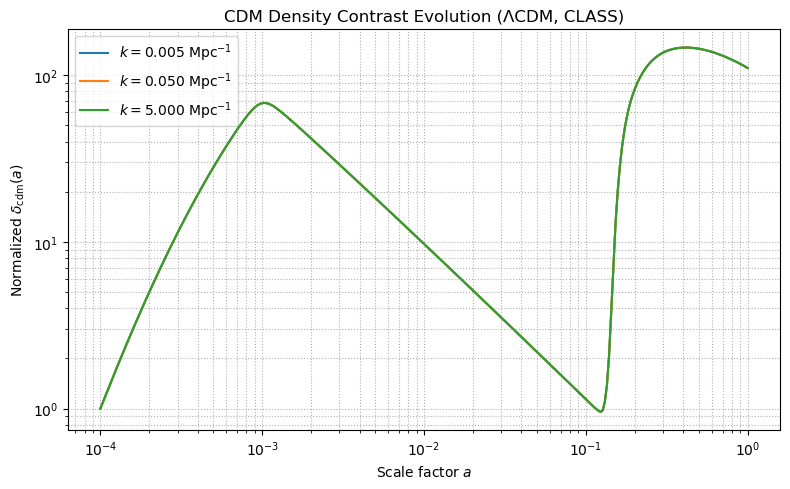

In [124]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

# Scale factor and redshift arrays
a_vals = np.logspace(-4, 0, 300)
z_vals = 1 / a_vals - 1

# k values in 1/Mpc
k_vals = [0.005, 0.05, 5.0]

# CLASS parameters (Planck-like ΛCDM)
h = 0.674
params = {
    'output': 'vTk',
    'P_k_max_1/Mpc': 10.0,
    'k_output_values': ','.join([str(k) for k in k_vals]),
    'z_pk': ','.join([f"{z:.6e}" for z in z_vals]),
    'h': h,
    'omega_b': 0.022 / h**2,
    'omega_cdm': 0.12 / h**2,
    'YHe': 0.24,
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'tau_reio': 0.054,
    'gauge': 'synchronous',
    'matter_source_in_current_gauge': 'yes'
}

# Run CLASS
cosmo = Class()
cosmo.set(params)
cosmo.compute()

# Plotting
plt.figure(figsize=(8, 5))

for i, k_target in enumerate(k_vals):
    # Extract δ_cdm(k, z) for each z
    delta_cdm = [cosmo.get_transfer(z)['t_b'][i] for z in z_vals]
    delta_cdm = np.array(delta_cdm)
    delta_cdm /= delta_cdm[0]  # Normalize to earliest value

    plt.loglog(a_vals, delta_cdm, label=fr"$k = {k_target:.3f}$ Mpc$^{{-1}}$")

# Finalize plot
plt.xlabel("Scale factor $a$")
plt.ylabel(r"Normalized $\delta_{\rm cdm}(a)$")
plt.title("CDM Density Contrast Evolution (ΛCDM, CLASS)")
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.savefig("delta_cdm_class_lcdm.png", dpi=300)
plt.show()

# Cleanup
cosmo.struct_cleanup()
cosmo.empty()


In [114]:
transfer_data = cosmo.get_transfer(z_vals[0])
print(transfer_data.keys())


dict_keys([])


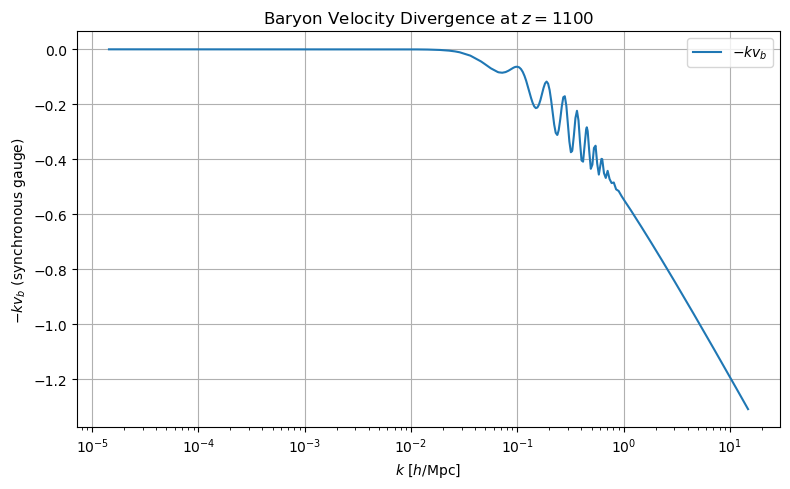

In [132]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

# Set redshift at which to extract the transfer functions
z_rec = 1100  # recombination

# Target k values in h/Mpc
k_vals = np.logspace(-3, 1, 30)

# CLASS parameters
params = {
    'output': 'vTk',  # Request velocity transfer functions
    'P_k_max_h/Mpc': 10.0,
    'k_output_values': ','.join([str(k) for k in k_vals]),
    'z_pk': str(z_rec),
    'gauge': 'synchronous',
    'h': 0.674,
    'omega_b': 0.022 / 0.674**2,
    'omega_cdm': 0.12 / 0.674**2,
    'YHe': 0.24,
    'A_s': 2.1e-9,
    'n_s': 0.965,
    'tau_reio': 0.054,
     'YHe': 0.24,
    'matter_source_in_current_gauge': 'yes'

}

# Run CLASS
cosmo = Class()
cosmo.set(params)
cosmo.compute()

# Get transfer functions at z = z_rec
transfers = cosmo.get_transfer(z_rec)

# Extract k and -k v_b = theta_b
k_array = np.array(transfers['k (h/Mpc)'])
theta_b = np.array(transfers['t_g'])  # = -k v_b

# Plot
plt.figure(figsize=(8, 5))
plt.plot(k_array, theta_b, label=r"$-k v_b$")
plt.xlabel(r"$k\ [h/\mathrm{Mpc}]$")
plt.ylabel(r"$-k v_b$ (synchronous gauge)")
plt.xscale("log")
plt.title(r"Baryon Velocity Divergence at $z = 1100$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("kvb_transfer_z1100.png", dpi=300)
plt.show()

# Cleanup
cosmo.struct_cleanup()
cosmo.empty()
